In [43]:
#Python version
import sys
print(sys.version)

#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


In [44]:
#Importing Dataset

df = pd.read_csv("data.csv")
df.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [45]:
df.shape

(3000, 23)

In [46]:
df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

<h1>Data Cleaning</h1>

In [47]:
df['belongs_to_collection'][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [48]:
df.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [49]:
dict = ['genres', 'spoken_languages', 'belongs_to_collection']

for i in range(0,len(dict)):
    
    df[dict[i]] = df[dict[i]].str.split(',').str[1]
    df[dict[i]] = df[dict[i]].astype(str)
    df[dict[i]] = df[dict[i]].str.replace(r"[\"\',]", '')
    df[dict[i]] = df[dict[i]].replace({'\]':''}, regex=True)
    df[dict[i]] = df[dict[i]].replace({'\}':''}, regex=True)
    df[dict[i]] = df[dict[i]].str.replace('name:', '')
    
df['cast'] = df['cast'].str.replace(r"]", '')
df['cast'] = df['cast'].str.replace(r"[", '')

df.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,Hot Tub Time Machine Collection,14000000,Comedy,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,English,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","{'cast_id': 4, 'character': 'Lou', 'credit_id'...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [50]:
df = df.drop(['id','imdb_id','poster_path','production_countries','production_companies','Keywords','cast','crew'], axis=1)
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'overview', 'popularity',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'revenue'],
      dtype='object')

In [51]:
df.head(1)

,belongs_to_collection,budget,genres,homepage,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,status,tagline,title,revenue
0,Hot Tub Time Machine Collection,14000000,Comedy,NaN,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,2/20/15,93.0,English,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651


In [52]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'overview', 'popularity',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'revenue'],
      dtype='object')

<h1>Exploratory Data Analysis</h1>

In [53]:
df.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


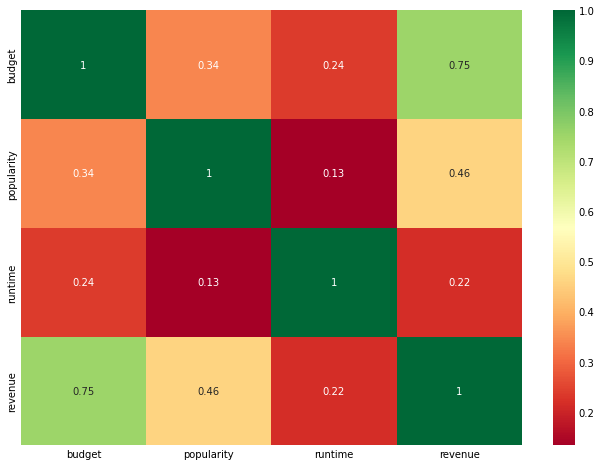

In [54]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'popularity'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'revenue'}>]], dtype=object)

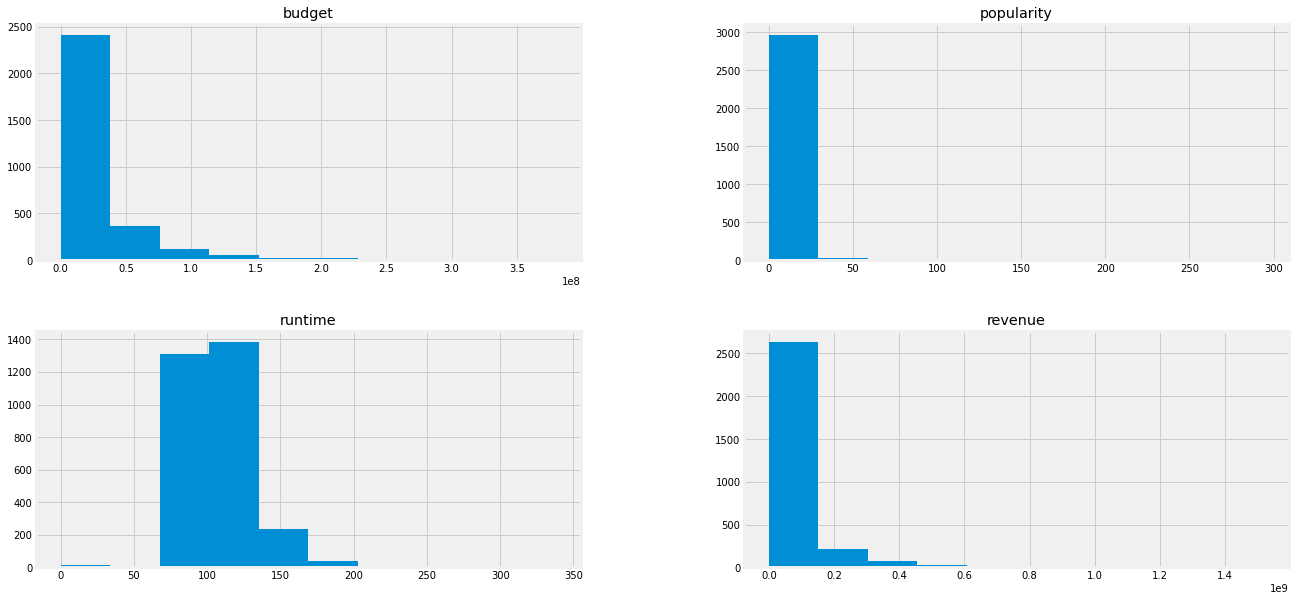

In [55]:
df.hist(figsize=(20,10))

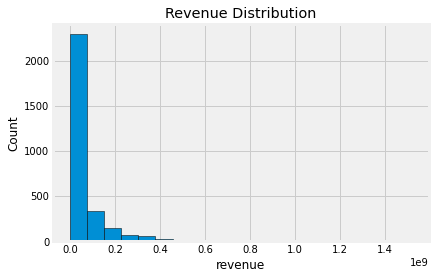

In [56]:
# Histogram Plot of revenue

plt.hist(df['revenue'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('revenue'); 
plt.ylabel('Count'); plt.title('Revenue Distribution');

In [57]:
df.head(1)

,belongs_to_collection,budget,genres,homepage,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,status,tagline,title,revenue
0,Hot Tub Time Machine Collection,14000000,Comedy,NaN,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,2/20/15,93.0,English,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651


<AxesSubplot:>

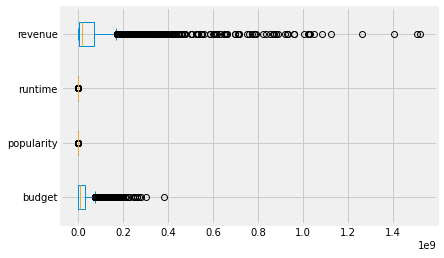

In [58]:
df.plot.box(vert=False)

In [59]:
df.head(1)

,belongs_to_collection,budget,genres,homepage,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,status,tagline,title,revenue
0,Hot Tub Time Machine Collection,14000000,Comedy,NaN,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,2/20/15,93.0,English,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651


In [60]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'original_title', 'overview', 'popularity',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'revenue'],
      dtype='object')

<h1>Data Pre-processing</h1>

In [61]:
df.isna().sum()

belongs_to_collection       0
budget                      0
genres                      0
homepage                 2054
original_language           0
original_title              0
overview                    8
popularity                  0
release_date                0
runtime                     2
spoken_languages            0
status                      0
tagline                   597
title                       0
revenue                     0
dtype: int64

In [62]:
df = df.fillna(0)
df.isna().sum()

belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
original_language        0
original_title           0
overview                 0
popularity               0
release_date             0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
revenue                  0
dtype: int64

In [63]:
df = pd.get_dummies(df, drop_first=True)

In [64]:
df.shape

(3000, 15200)

In [65]:
dff = df.drop('revenue', axis=1)
Columns = dff.columns
print(Columns)

Index(['budget', 'popularity', 'runtime',
       'belongs_to_collection_  12 Rounds Collection',
       'belongs_to_collection_  2 Days In... Collection',
       'belongs_to_collection_  28 Days/Weeks Later Collection',
       'belongs_to_collection_  300 Collection',
       'belongs_to_collection_  48 Hrs. Collection',
       'belongs_to_collection_  8MM Collection',
       'belongs_to_collection_  A Better Tomorrow Collection',
       ...
       'title_Zombieland', 'title_Zookeeper', 'title_Zootopia',
       'title_Zyzzyx Road', 'title_[REC]', 'title_[REC]²',
       'title_[REC]⁴ Apocalypse', 'title_¿Quién mató a Bambi?',
       'title_А поутру они проснулись', 'title_Королёв'],
      dtype='object', length=15199)


In [66]:
df.head(3)

,budget,popularity,runtime,revenue,belongs_to_collection_ 12 Rounds Collection,belongs_to_collection_ 2 Days In... Collection,belongs_to_collection_ 28 Days/Weeks Later Collection,belongs_to_collection_ 300 Collection,belongs_to_collection_ 48 Hrs. Collection,belongs_to_collection_ 8MM Collection,...,title_Zombieland,title_Zookeeper,title_Zootopia,title_Zyzzyx Road,title_[REC],title_[REC]²,title_[REC]⁴ Apocalypse,title_¿Quién mató a Bambi?,title_А поутру они проснулись,title_Королёв
0,14000000,6.575393,93.0,12314651,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40000000,8.248895,113.0,95149435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3300000,64.299990,105.0,13092000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[df.columns.difference(['revenue'])] = scaler.fit_transform(df[df.columns.difference(['revenue'])])

In [68]:
df.head(1)

,budget,popularity,runtime,revenue,belongs_to_collection_ 12 Rounds Collection,belongs_to_collection_ 2 Days In... Collection,belongs_to_collection_ 28 Days/Weeks Later Collection,belongs_to_collection_ 300 Collection,belongs_to_collection_ 48 Hrs. Collection,belongs_to_collection_ 8MM Collection,...,title_Zombieland,title_Zookeeper,title_Zootopia,title_Zyzzyx Road,title_[REC],title_[REC]²,title_[REC]⁴ Apocalypse,title_¿Quién mató a Bambi?,title_А поутру они проснулись,title_Королёв
0,0.036842,0.02234,0.275148,12314651,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
X = np.array(df.drop(['revenue'], axis=1))
y = np.array(df['revenue'])

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=15 ,test_size=0.3)

<h1>Model Building</h1>

In [71]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

def fit_and_evaluate(model):
    
    model.fit(x_train, y_train)
    
    model_pred = model.predict(x_test)
    model_mae = mae(y_test, model_pred)
    
    return model_mae

In [72]:
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [73]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

lg = lgb.LGBMRegressor()
lg_mae = fit_and_evaluate(lg)

random_forest = RandomForestRegressor(random_state=12)
random_forest_mae = fit_and_evaluate(random_forest)

gradient_boosted = GradientBoostingRegressor(random_state=12)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

knn = KNeighborsRegressor(n_neighbors=1000)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression   : MAE = %0.4f' %knn_mae)

print('Gradient Boosting Regression     : MAE = %0.4f' %gradient_boosted_mae)

print('Random Forest Regression         : MAE = %0.4f' %random_forest_mae)

print('Light Boosted Regression         : MAE = %0.4f' %lg_mae)

print('Linear Regression Performance    : MAE = %0.4f' %lr_mae)

K-Nearest Neighbors Regression   : MAE = 58469232.7736
Gradient Boosting Regression     : MAE = 39730159.0171
Random Forest Regression         : MAE = 36652439.5291
Light Boosted Regression         : MAE = 41105430.5949
Linear Regression Performance    : MAE = 44098628.6957


Text(0.5, 1.0, 'Model Comparison on Test MAE')

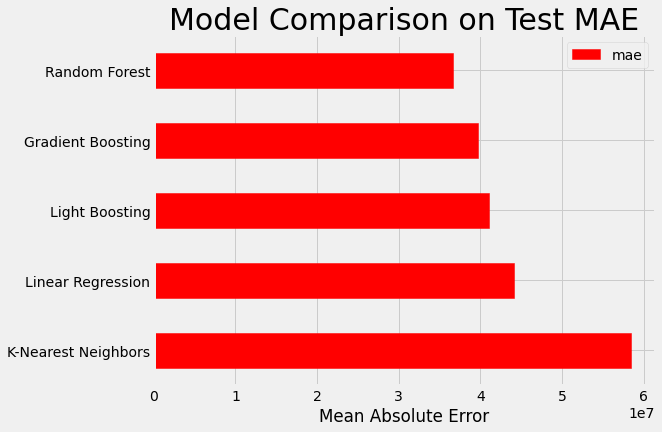

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 24
from IPython.core.pylabtools import figsize
figsize(8, 8)

plt.style.use('fivethirtyeight')
figsize(8,6)

model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Light Boosting', 
                                 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors'],
                                'mae': [lr_mae, lg_mae, random_forest_mae, gradient_boosted_mae, knn_mae]})

model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh', color = 'red',
                                                           edgecolor = 'red')

#PLOT FORMATTING
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 30)

<h3>Random Forest Regressor</h3>

In [75]:
model_1 = RandomForestRegressor(random_state=12)

model_1.fit(x_train, y_train)

prediction_1 = model_1.predict(x_test)

print('Final Model Performance: MAE = %0.4f' % mae(y_test, prediction_1))

Final Model Performance: MAE = 36652439.5291


<h6>Prediction Example</h6>

In [76]:
# Test Data

x_test[20]

array([0.01786316, 0.02677546, 0.30473373, ..., 0.        , 0.        ,
       0.        ])

In [77]:
# Actual Data

y_test[20]

13878334

In [78]:
# Model Prediction

model_1.predict(x_test[20].reshape(1,-1))

array([7960531.16])

<h6>Test Set vs Prediction Set</h6>

Text(0.5, 1.0, 'RF: Test Values and Predictions')

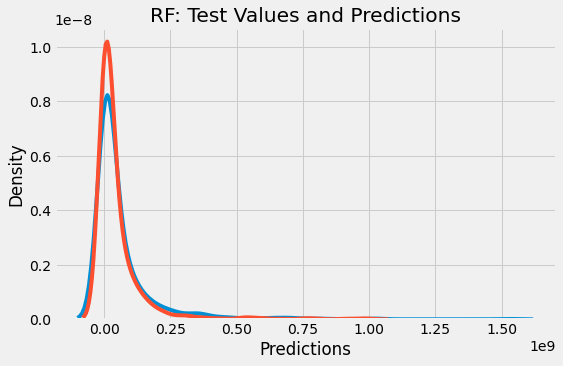

In [79]:
import seaborn as sns
figsize(8, 5)

# Density plot of the final predictions and the test values
sns.distributions._has_statsmodels = False
sns.kdeplot(y_test, label = 'Values')
sns.kdeplot(prediction_1, label = 'Predictions')

# Label the plot
plt.xlabel('Target'); plt.ylabel('Density');
plt.xlabel('Predictions'); plt.ylabel('Density');
plt.title('RF: Test Values and Predictions')

<h3>Cross Validation</h3>

In [80]:
#Cross Validation

X = np.array(df.drop(['revenue'], axis=1))
y = np.array(df['revenue'])

X = pd.DataFrame(X)
y = pd.DataFrame(y)

from sklearn.model_selection import KFold
KFold

kf = KFold(n_splits = 10, shuffle = True)
model_2 = RandomForestRegressor(random_state=12, min_samples_leaf=2)

scores = []
for i in range(10):
    result = next(kf.split(df, None))
    x_train_1 = X.iloc[result[0]]
    x_test_1 = X.iloc[result[1]]
    y_train_1 = y.iloc[result[0]]
    y_test_1 = y.iloc[result[1]]
    
    y_test_1 = np.array(y_test_1)
    y_test_1 = y_test_1.reshape(-1, )
    
    model_2.fit(x_train_1, y_train_1)
    
    prediction_2 = model_2.predict(x_test_1)
    
    def mae(y_test_1, prediction_2):
        return np.mean(abs(y_test_1 - prediction_2))
    
    scores.append(mae(y_test_1, prediction_2))  

print('Range is:', 10)

print('Cross Validation Performance: MAE = %0.4f' % np.mean(scores))
print('Random Forest Performance: MAE = %0.4f' % mae(y_test, prediction_1))

Range is: 10
Cross Validation Performance: MAE = 37455555.5668
Random Forest Performance: MAE = 36652439.5291


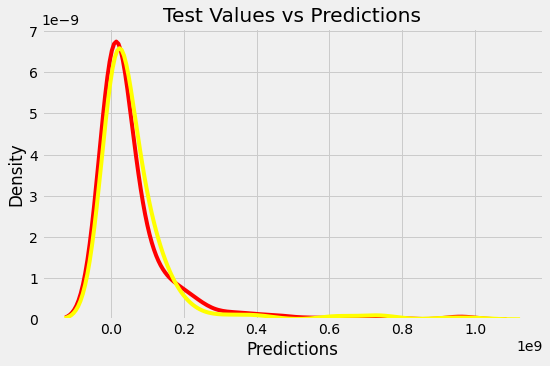

In [88]:
import seaborn as sns
figsize(8, 5)

# Density plot of the final predictions and the test values
sns.kdeplot(y_test_1, label = 'Values', color="Red")
sns.kdeplot(prediction_2, label = 'CV_Pred', color="Yellow")

# Label the plot
plt.xlabel('Target'); plt.ylabel('Density');
plt.xlabel('Predictions'); plt.ylabel('Density');
plt.title('Test Values vs Predictions');

<h3>Exporting Model</h3>

In [89]:
#Exporting Model

import joblib

filename = 'Model/Forecasting-model.sav'
joblib.dump(model_2, filename)

filename = 'Model/Model-columns.sav'
joblib.dump(Columns, filename)

['Model/Model-columns.sav']